

Kristina Liu


BI 260


Homework 5


<u>**Matlab help:**</u>


A structuring element can be specified with a binary array.


se = zeros(7,7);


The origin is chosen in the center \-\-\- e.g., indices (4,4) in the 7x7 array.


se(1,1)=1;


The one point in the structuring element, indicated with value 1 in the array, is thus at coordinates (\-3,\-3).


The function strel also constructs a structuring element. See the documentation of the strel function for details of specifying the structuring element (help strel).





In Matlab a dilation is done using the function imdilate.


Dilating the binary image in b is done with c = imdilate(b,se);


Similarly explore imerode for erosion.





<u>**Removing border objects:**</u>

1.  Read the image potatoes12.tif and threshold it to obtain a binary image representing 12 potato silhouttes:

a = im2double( imread(‘potatoes12.tif’) );


b = a > 0.3;



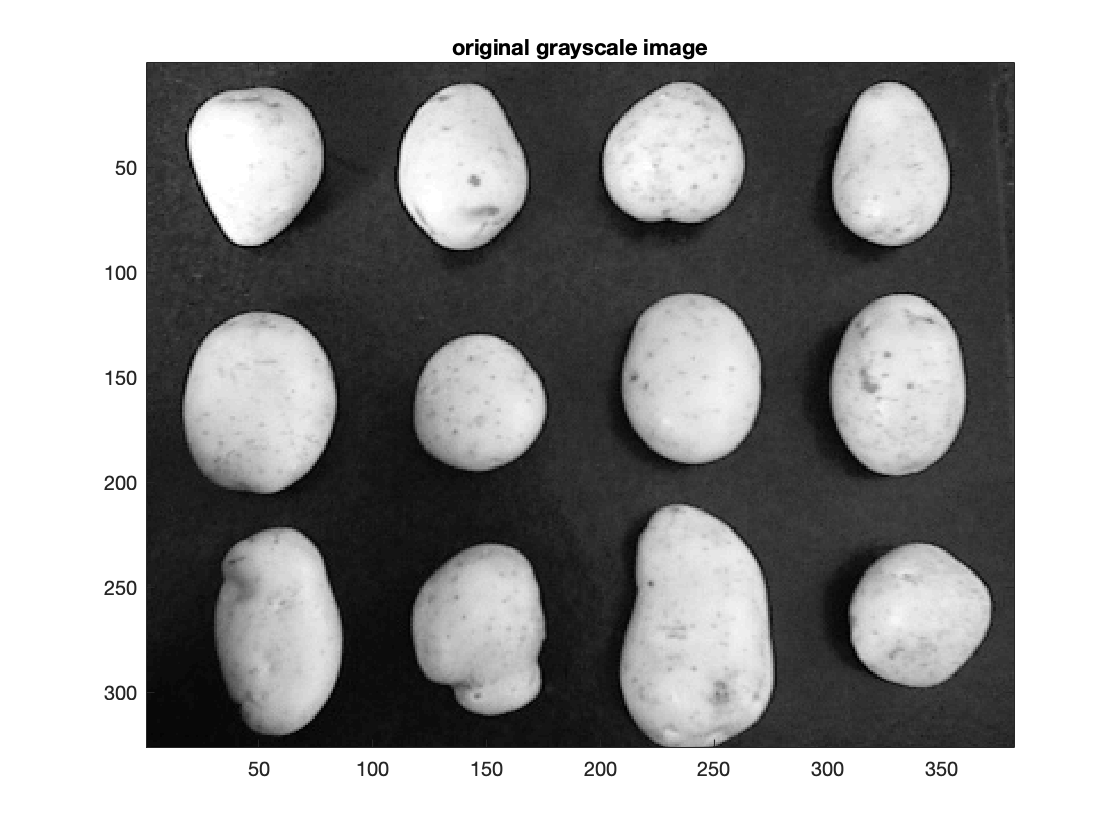

In [1]:
potatoes = im2double(imread('potatoes12.tif'));
imagesc(potatoes); colormap gray
title('original grayscale image')


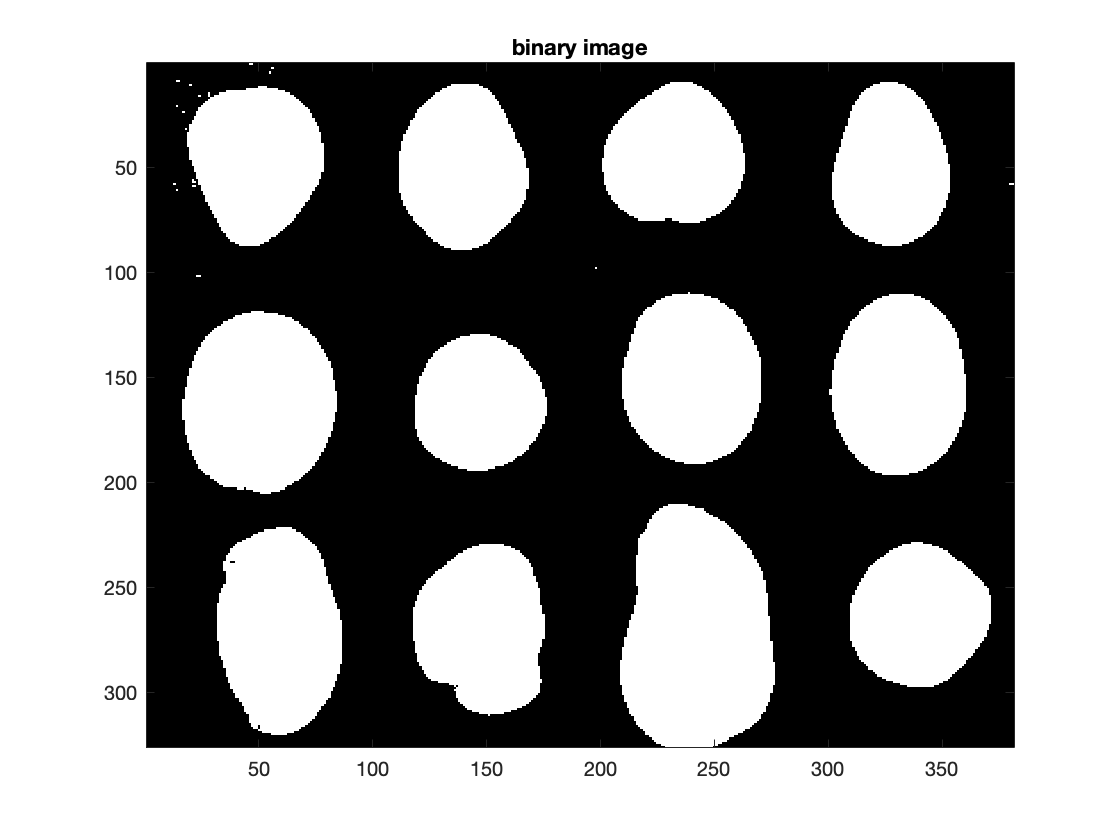

In [2]:
p_binary = imbinarize(potatoes,0.3);
imagesc(p_binary); colormap gray
title('binary image')



Remove the small objects and fill the small holes from the binary image b. Provide details of the sequence of morphological operations that lead to the desired result, including a specification of the size and shape of the structuring elements that are used. In your report you should also plot the resulting images.



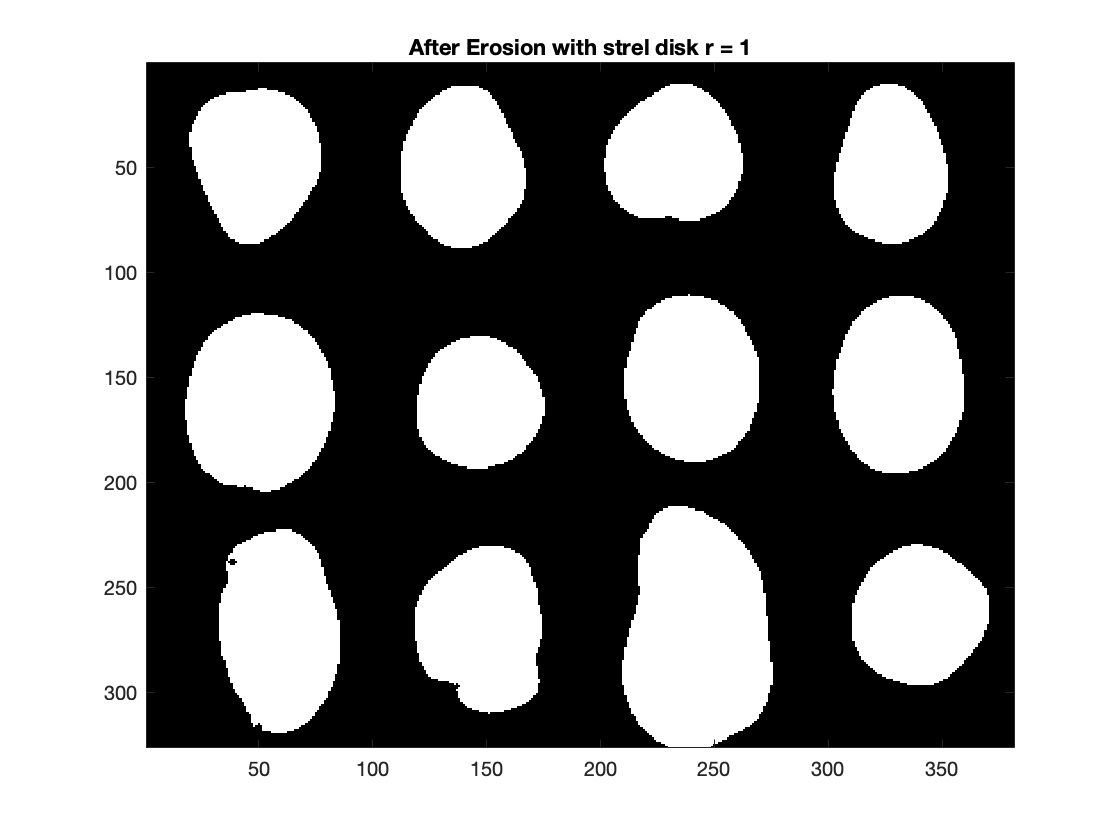

In [3]:
p_erode = imerode(p_binary,strel('disk',1,4));
imagesc(p_erode); colormap gray
title('After Erosion with strel disk r = 1')


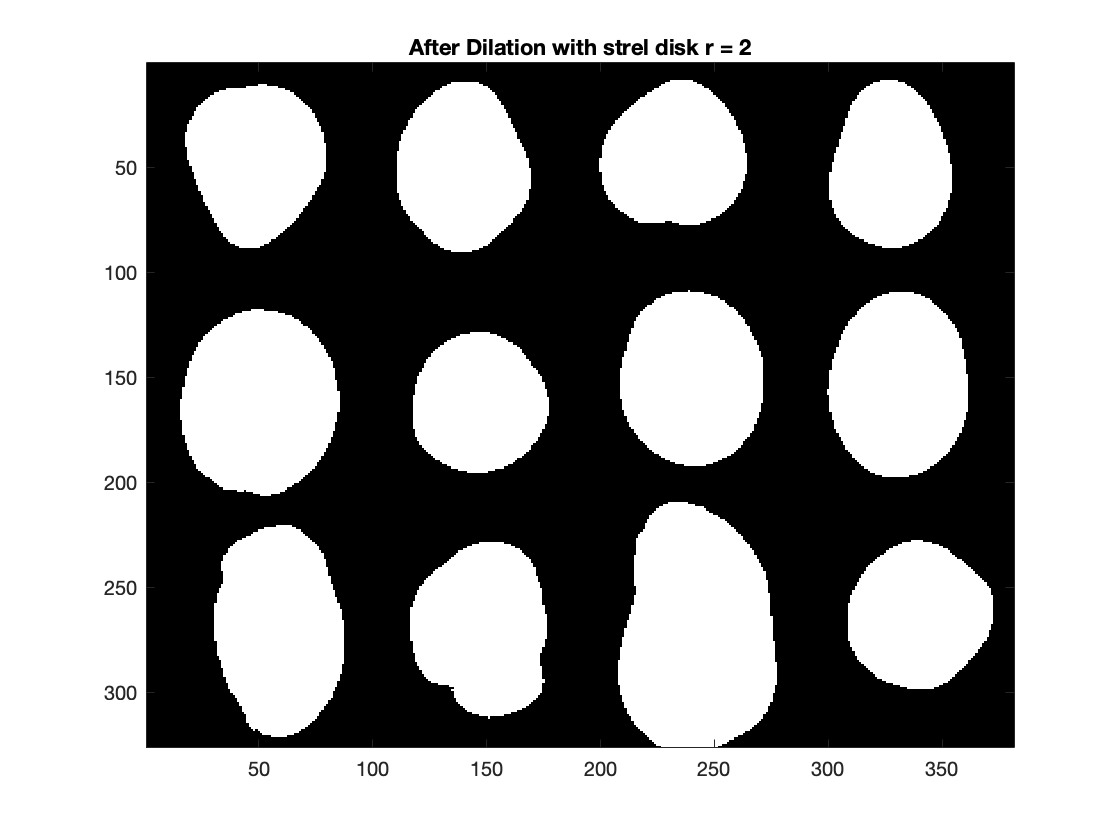

In [4]:
p_dilate=double(imdilate(p_erode,strel('disk',2,4)));
imagesc(p_dilate); colormap gray
title('After Dilation with strel disk r = 2')

1.  One of the potatoes is crop at the image boundary and not entirely visible in the image. Using morphology operators remove this border potato from the image while preserving the rest.

**Hint 1:** First find the potato points that are at the image border and use these points to find all points in the border potato and finally remove that potato from the set representing all 12 potatoes.


**Hint 2:** An image with only the border set to value 1 and everything else at 0 can be done in Matlab:


border = zeros( size(im) );


border(1,:) = 1;


border(end,:) = 1;


border(:,1) =1;


border(:,end) = 1;


**Hint 3:** In Matlab the reconstruction operator is implemented by the function imreconstruction.






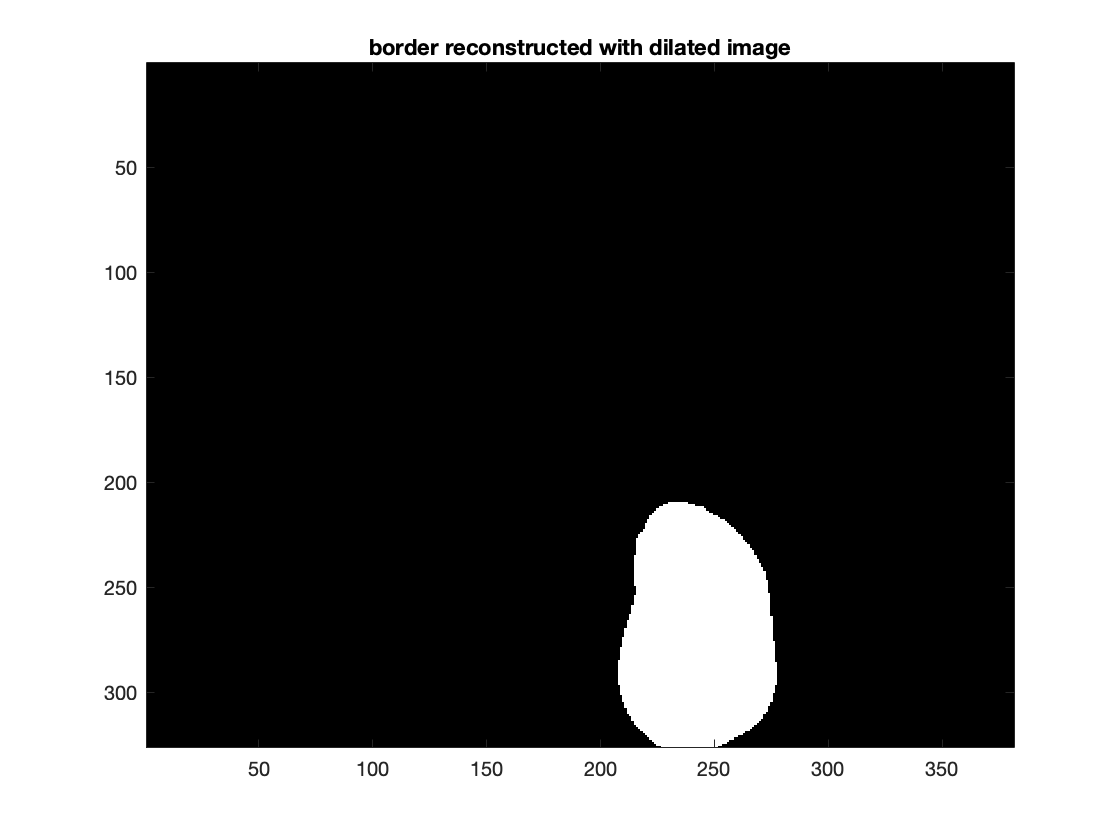

In [5]:
border = zeros(size(p_dilate));
border(1,:) = 1;
border(end,:) = 1;
border(:,1) =1;
border(:,end) = 1;
border_potatoe= imreconstruct(border,p_dilate,4);
imagesc(border_potatoe); colormap gray
recon_im = p_dilate - border_potatoe;
title('border reconstructed with dilated image')


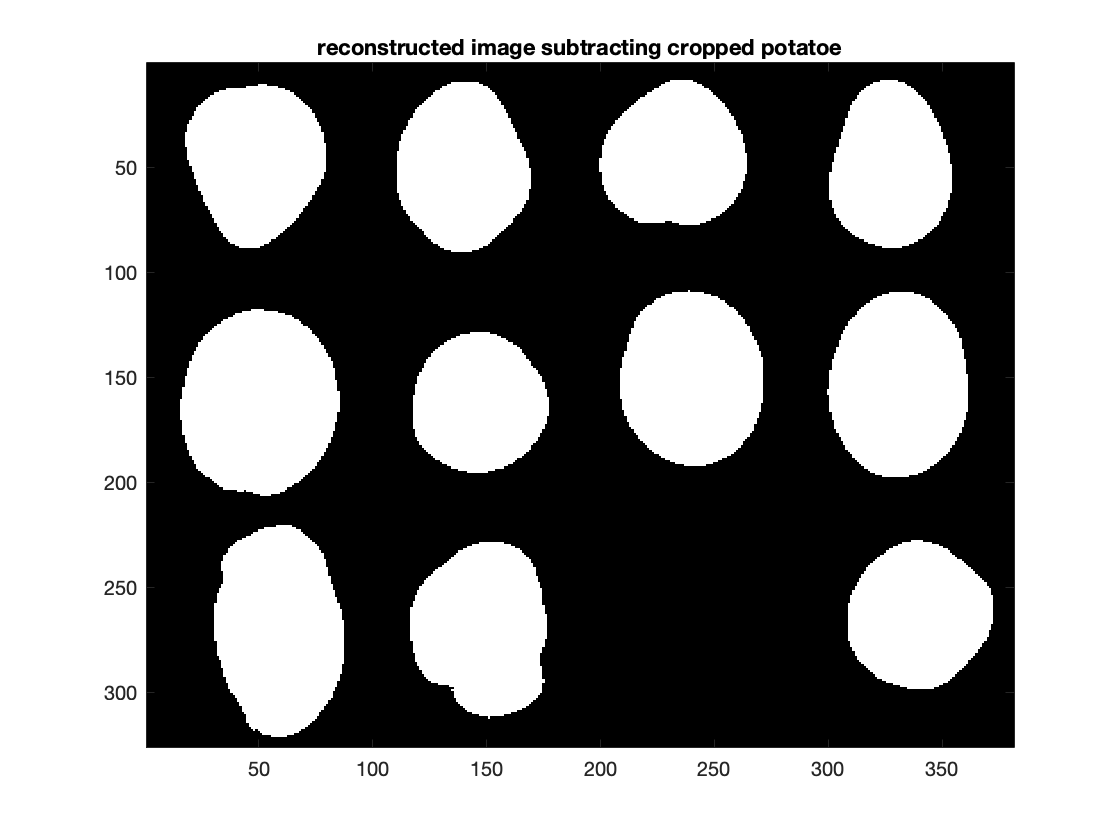

In [6]:
imagesc(recon_im); colormap gray
title('reconstructed image subtracting cropped potatoe')


<u>**Selection on size:**</u>


Load the image cookies.tif. This images shows two cookies, one of which is broken.



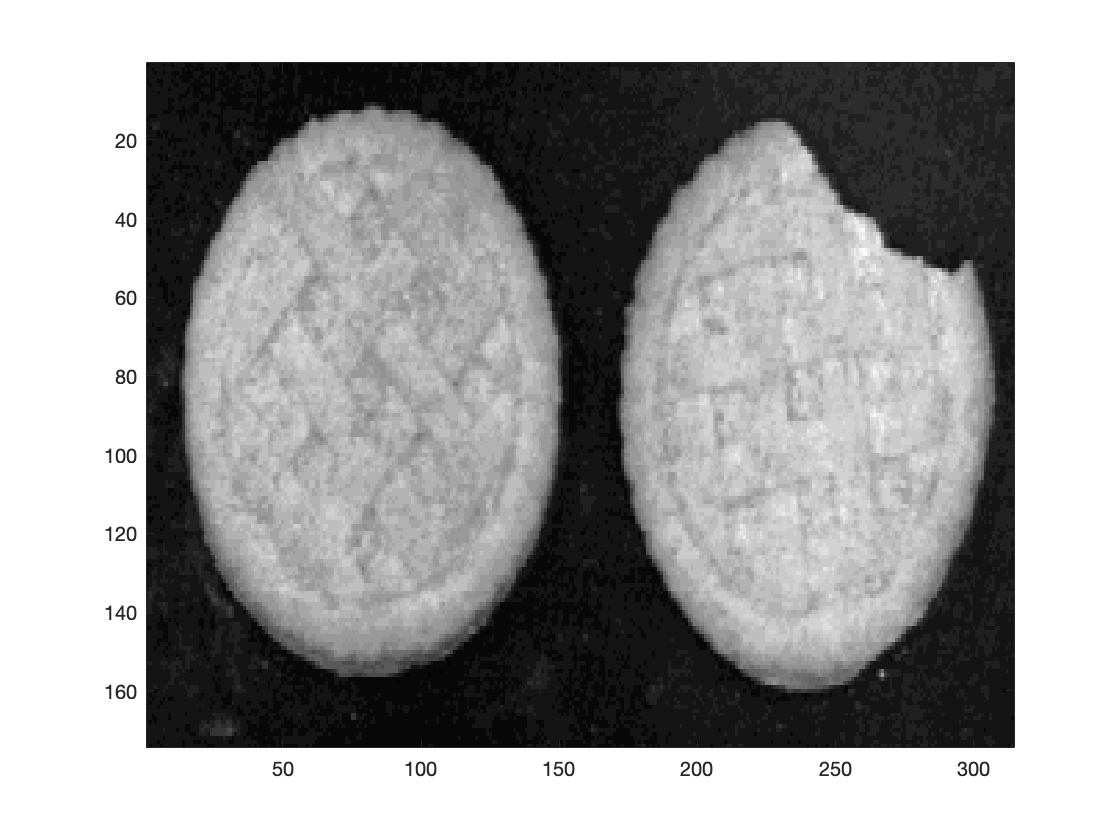

In [7]:
cookies = im2double(imread('cookies.tif'));
imagesc(cookies); colormap gray


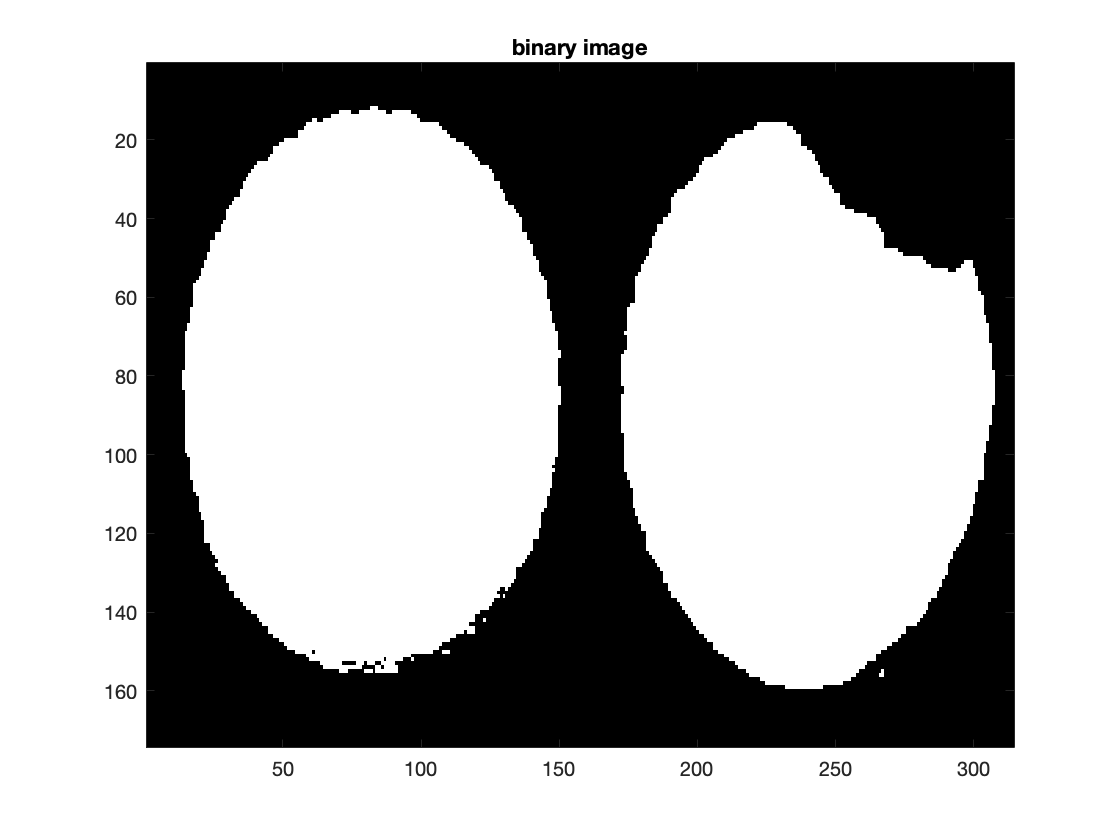

In [8]:
c_binary = imbinarize(cookies,0.3);
imagesc(c_binary); colormap gray
title('binary image')


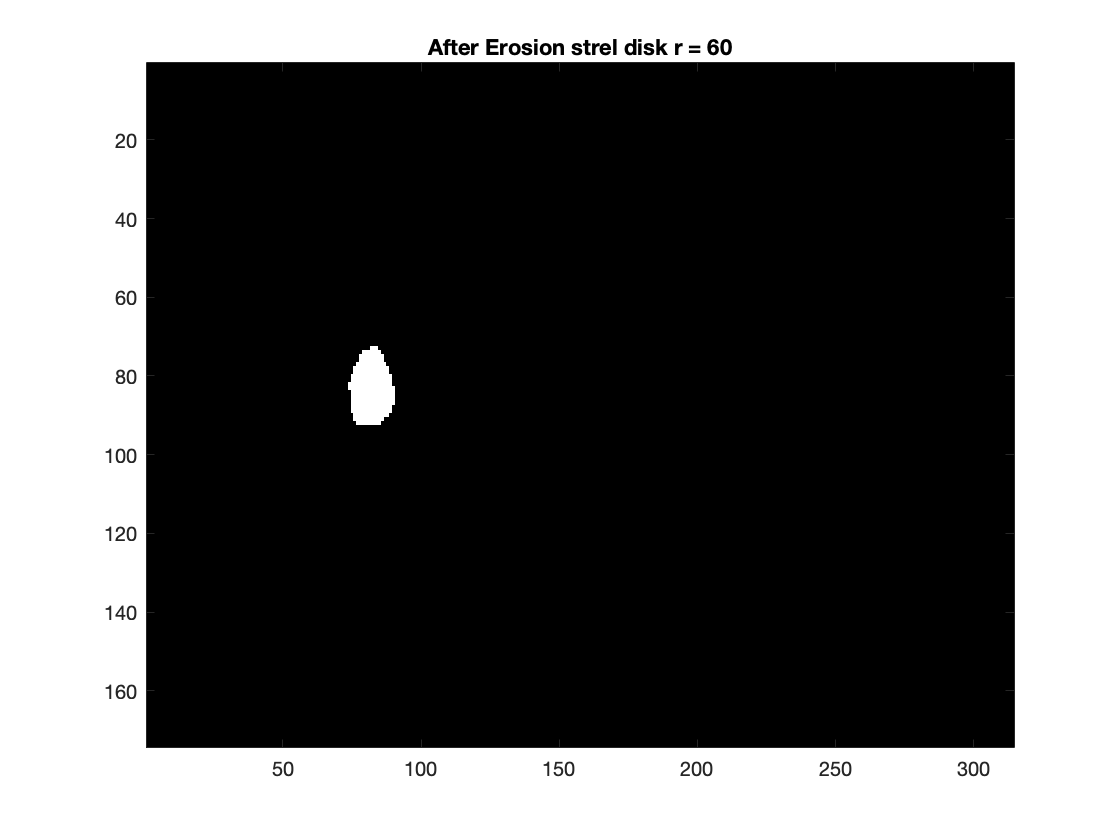

In [9]:
c_erode = imerode(c_binary,strel('disk',60,0));
imagesc(c_erode); colormap gray
title('After Erosion strel disk r = 60')


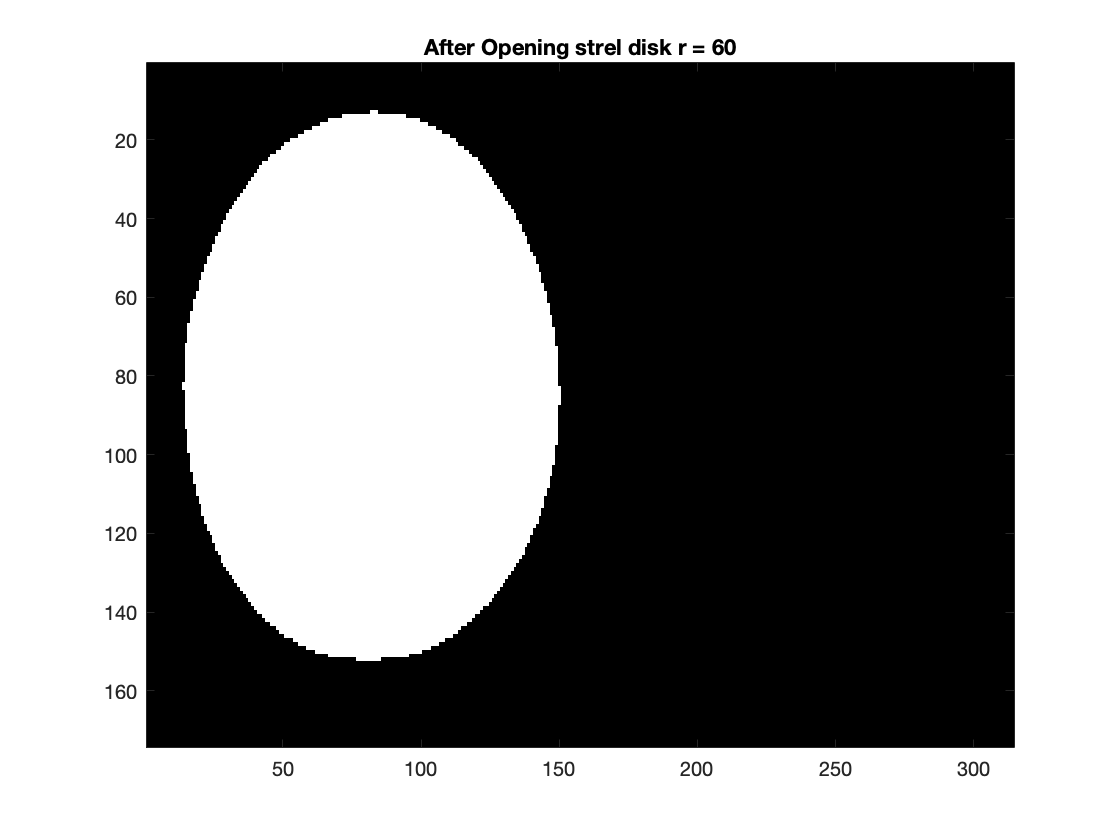

In [10]:
c_open = imdilate(c_erode,strel('disk',60,0));
imagesc(c_open); colormap gray
title('After Opening strel disk r = 60')


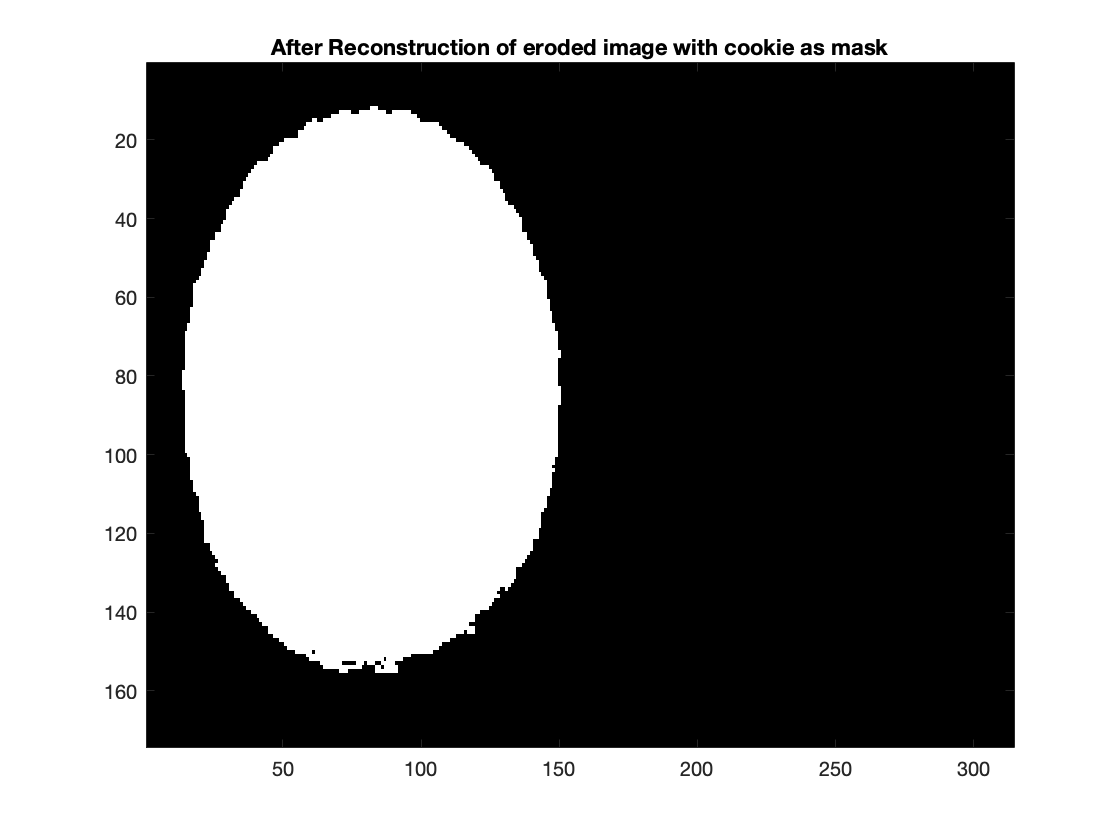

In [11]:
c_recon= imreconstruct(c_erode,c_binary,4);
imagesc(c_recon); colormap gray
title('After Reconstruction of eroded image with cookie as mask')

1.  What erosion should be used to remove the entire broken cookie shape, while leaving some parts of the other cookie? This should work independently of the orientation of the cookies. Show the eroded image together with a specification of the structuring element that is used.
2. The opening that is built from the erosion above and the corresponding dilation tries to reconstruct the original shape of the cookie. Show the opening result in your report.
3. Instead of the dilation we can use a reconstruction operator to find the original cookie again. What is the difference with the erosion followed by a dilation result? Why is the reconstruction a viable alternative for this image?

Reconstruction is a viable alternative because you can build the shape of the cookie in the mask on the amount that is left for the unbroken cookie by connecting neighbors.

